# Chapter 2 - The Model

In this notebook I summarize the deterrence model of the research.

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import math
import scipy.stats as ss
from math import sqrt
from scipy.stats import norm


Based ond Polinsky and Shavell (2007):

# $W=\int^\infty_{p(e)f}(g-h)z(g)dg - e$

Where:

$g$ = gains

$h$ = harm

$z(g)$ = distribution of gains between individuals

$e$ = enforcement expenditure

$p(e)$ = probability of conviction      $p(e)'>0$ and $p(e)''<0$

$f$= fines

$w$ = Individual wealth

Individual decision rule $g>p(e)f$

Maximizing $W$ subject to $p(e)f$ (by fundamental theorem of calculus):

$W_{s}'=(f*-h)z(f*)=0$

$W_{s}'=(f*-h)=0$

Showing that $f*=h/p(e)$

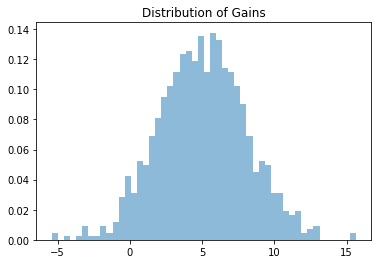

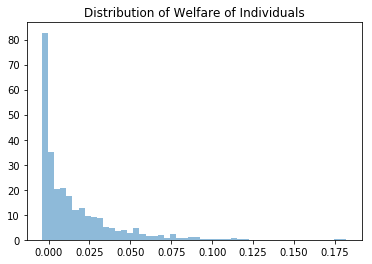

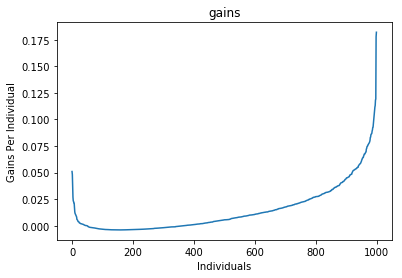

None


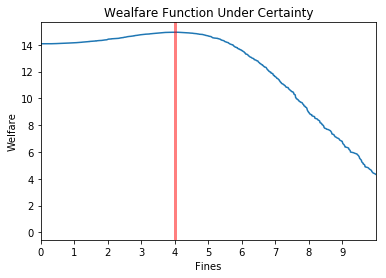

None


In [2]:
#drawing the distribution of gains and the Welfare function
n = 1000
x = np.arange(0, n)
g = np.random.normal(loc=5, scale=3, size=n)  #for binomial(np.random.binomial(n=10,p=5,size=n)), it is close to normal but there is no negative gains # make a continuous function
#truncate the distribution 
g = np.sort(g) # organazing the gains in ascending order
h = 4 # harm
e = 10 #Budget expenditure 
p = 0.6  #((e**(0.2))*(0.4**(0.8)))# probabilit of being caught and convicted 
# if e<5 than p(e)'>0 and p(e)''<0 respectin conditions(Polinsky and Shavell, 2007, pg 412) 
f = np.arange(0, n) # range of the fines
W = [] # Welfare without uncertainty

for i in g:
     W.append(((i-h)*(i/n)))

Wc = [] #welfare Function under certainty 

for i in x:
    Wc.append(np.sum(W[i:n]))
           

        
        
plt.hist(g, alpha=0.5, bins=50, density=True)
plt.title('Distribution of Gains')
plt.show()

plt.hist(W, alpha=0.5, bins=50, density=True)
plt.title('Distribution of Welfare of Individuals')
plt.show()

plt.plot(x, W)

plt.xlabel('Individuals')
plt.ylabel('Gains Per Individual')
plt.title('gains')

print(plt.show())

plt.plot(g, Wc )
plt.axvline((h), color='red', lw=3, alpha=0.5)

plt.xticks(np.arange(0, 10, 1))
plt.xlim([0, 10])
plt.xlabel('Fines')
plt.ylabel('Welfare')
plt.title('Wealfare Function Under Certainty')

print(plt.show())




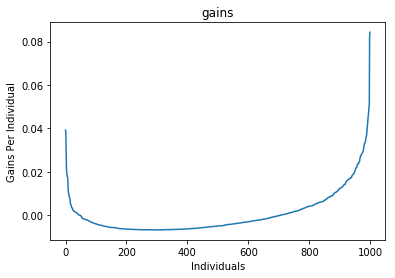

None


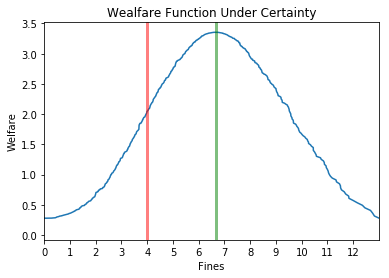

None


In [3]:
#Welfare Function under uncertainty and with eforcement expenditures
W2 = []
for i in g:
     W2.append(((i*p)-h)*(i/n))  # ad (-e/n) to obtain the welfare with the enforcements


Wu = [] #welfare Function under certainty 

for i in x:
    Wu.append(np.sum(W2[i:n]))
    
plt.plot(x, W2)

plt.xlabel('Individuals')
plt.ylabel('Gains Per Individual')
plt.title('gains')

print(plt.show())

plt.plot(g, Wu )
plt.axvline((h), color='red', lw=3, alpha=0.5)
plt.axvline((h/p), color='green', lw=3, alpha=0.5)

plt.xticks(np.arange(0, 13, 1))
plt.xlim([0, 13])
plt.xlabel('Fines')
plt.ylabel('Welfare')
plt.title('Wealfare Function Under Certainty')

print(plt.show())



# note that the condition is that p(e)*f=h, so one can exchange always fine per probability of conviction mantaining the product constant.
# Nao consegui replicar as condicoes para p(e) 
# Try to define better the image and the domain of the p(e) function
# there is overdeterrence in this attempt
           

# The Risk Averse Case

$(1 − λ)U(w − t − λh) + \int^{∞}_{p[U(w−t−λh)−U(w−t−λh−f )]}  [g + (1 − p)U(w − t − λh) + pU(w − t − λh − f )]z(g)dg − e$

$w$ = wealth

p = Probability of detection and conviction

h = harm

g = gains distributed d(.)

$U(.)$ = Utility of wealth, Concave in $w$

$t$ =tax

$\lambda$ = fraction of the population that commit wrongfull acts

Individual decision rule: $g + (1 − p)U(w − t − λh) + pU(w − t − λh − f ) > U(w − t − λh)$

Equivalenty: $g > p[U(w − t − λh) − U(w − t − λh − f )]$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


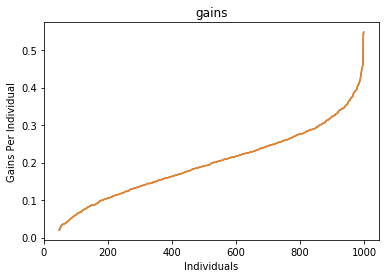

None


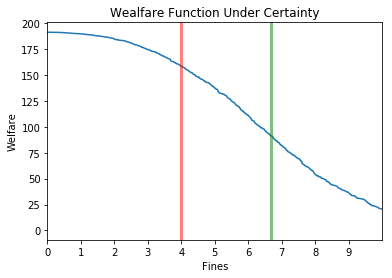

None


In [4]:
w = 10
t = 3
lamb = 0.4
fp = h/p
U1 = (w**(1.8)*(lamb*h)**(-0.4)*t**(-0.4)) # not fined

U2 = (w**(1.8)*(lamb*h)**(-0.4)*t**(-0.4)*fp**(-1.4)) # fined

Wra = []

for i in g:
    Wra.append((((1-lamb)*U1)/n)+(((p*(U1-(w**(1.8)*(lamb*h)**(-0.4)*t**(-0.4)*i**(-1.4))))+(1-p)*U1+p*(w**(1.8)*(lamb*h)**(-0.4)*t**(-0.4)*i**(-1.4)))*(i/n)))

plt.plot(Wra)


Wra2 = [] #welfare Function under certainty 

for i in x:
    Wra2.append(np.sum(Wra[i:n]))
    
plt.plot(x, Wra)

plt.xlabel('Individuals')
plt.ylabel('Gains Per Individual')
plt.title('gains')

print(plt.show())

plt.plot(g, Wra2 )
plt.axvline((h), color='red', lw=3, alpha=0.5)
plt.axvline((h/p), color='green', lw=3, alpha=0.5)

plt.xticks(np.arange(0, 10, 1))
plt.xlim([0, 10])
plt.xlabel('Fines')
plt.ylabel('Welfare')
plt.title('Wealfare Function Under Certainty')

print(plt.show())

#Only getting corner solutions WHY?




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Concave Utility on Wealth')

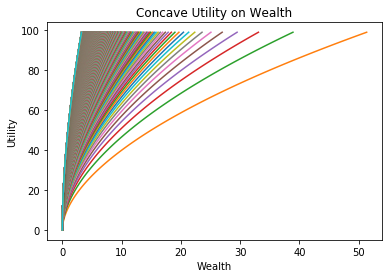

In [5]:
Ui = []

for i in x:
    Ui.append((i/10)**(1.8)*(lamb*h)**(-0.4)*f**(-0.4))

plt.plot(Ui[0:100], x[0:100])

plt.xlabel('Wealth')
plt.ylabel('Utility')
plt.title('Concave Utility on Wealth')


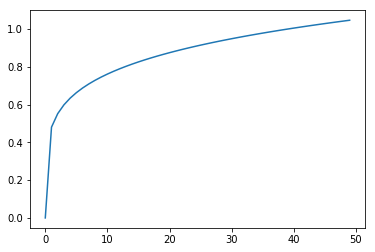

In [13]:
y = []
for i in range(0,50):
    y.append((i**(0.2))*(0.4**(0.8)))

plt.plot(y)

# The Dinamic Model 

Here the incentive mechanism for agent's decision is modelled with other regarding decisions.

Based on Motta and Polo (2003) and Harrington (2008).

